In [221]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_extraction.text import CountVectorizer

In [222]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [234]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Deployment/data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [224]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [237]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
# impute missing categorical values with mode
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [238]:
# randomly drop 150 rows from majority class to make imbalanced dataset
df = df.drop(df[df.Credit_History == 1].sample(150).index)

In [240]:
# ranomly duplicate 150 rows from minority class to make imbalanced dataset
df = df.append(df[df.Credit_History == 0].sample(50), ignore_index=True)

/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_41046/3284179510.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df[df.Credit_History == 0].sample(50), ignore_index=True)


In [249]:
# impute missing Credit_History values with mode        
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [250]:
#Count number of Yes and No in Loan_Status
df['Credit_History'].value_counts()

1.0    375
0.0    139
Name: Credit_History, dtype: int64

In [251]:
for col in df.columns:
    print(col, df[col].isnull().sum())

Loan_ID 0
Gender 0
Married 0
Dependents 0
Education 0
Self_Employed 0
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 21
Loan_Amount_Term 16
Credit_History 0
Property_Area 0
Loan_Status 0


In [252]:
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')), 
    ('selector', SelectPercentile(chi2, percentile=25))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#smote = Pipeline(steps=[('preprocessor', preprocessor), ('smote', SMOTENC(random_state=42, categorical_features=categorical_features))])

X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# make predictions using different models
models = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()), 
    ('gb', GradientBoostingClassifier()),
    ('ab', AdaBoostClassifier()),
    ('et', ExtraTreesClassifier()),
    ('svc', SVC())]

# create a pipeline to test different models
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', model)])
    pipe.fit(X_train, y_train)   
    print(name, pipe.score(X_test, y_test))


model = Pipeline(steps=[('preprocessor', preprocessor), 
                        ('classifier', RandomForestClassifier())])

# X = df.drop(['Loan_Status'], axis=1)
# y = df['Loan_Status']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("model score: %.3f" % model.score(X_test, y_test))
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# print pipeline mapping
from sklearn import set_config
set_config(display='diagram')
model

lr 0.8446601941747572
knn 0.8155339805825242
dt 0.7669902912621359
rf 0.8155339805825242
gb 0.8252427184466019
ab 0.8543689320388349
et 0.8349514563106796
svc 0.8252427184466019


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=25,
                                                                                    score_func=<function chi2 at 0x7f92aa221550>))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', RandomForestClassifier())])

In [254]:
# Model final with hyper parameters and cross validation and over sampling
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(C=0.08858667904100823, max_iter=20, penalty='l2', solver='lbfgs'))])

X = df.drop(['Loan_Status'], axis=1)
model.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=25,
                                                                                    score_func=<function chi2 at 0x7f92aa221550>))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier',
                 LogisticRegression(C=0.08858667904100823, max_iter=20))])

In [255]:
print(model.score(X, y))
print(model.score(X_test, y_test))

0.8287937743190662
0.8446601941747572


In [ ]:
#

In [256]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.97      0.67      0.79        45
           Y       0.79      0.98      0.88        58

    accuracy                           0.84       103
   macro avg       0.88      0.82      0.83       103
weighted avg       0.87      0.84      0.84       103

[[30 15]
 [ 1 57]]


In [258]:
# save model
import pickle
pickle.dump(pipeline, open('model.pkl', 'wb'))

NameError: name 'pipeline' is not defined

In [394]:
# Pipeline for Logistic regression
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')), 
    ('selector', SelectPercentile(chi2, percentile=25))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#smote = Pipeline(steps=[('preprocessor', preprocessor), ('smote', SMOTENC(random_state=42, categorical_features=categorical_features))])

X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline for Logistic Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(C=0.08858667904100823, max_iter=20, penalty='l2', solver='lbfgs'))])

KeyError: "['Loan_Status'] not found in axis"

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=25,
                                                                                    score_func=<function chi2 at 0x7f92aa221550>))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier',
                 LogisticRegression(C=0.08858667904100823, max_iter=20))])

In [457]:
# get accuracy score
print('Accuracy: ', accuracy_score(y_test, pipeline.predict(X_test)))

# get confusion matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, pipeline.predict(X_test)))


Accuracy:  0.8446601941747572
Confusion Matrix: 
 [[30 15]
 [ 1 57]]


In [458]:
import seaborn as sns

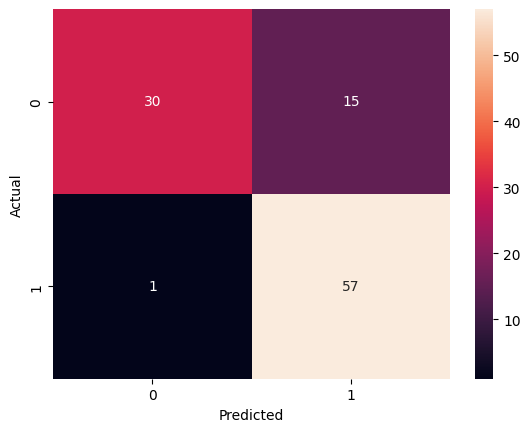

In [460]:
# plot confusion matrix heatmap background color is black

cm = confusion_matrix(y_test, pipeline.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# cm = confusion_matrix(y_test, pipeline.predict(X_test))
# sns.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


In [433]:
from lets_plot.bistro.corr import *
from lets_plot import *
LetsPlot.setup_html()

In [442]:
#convert to dataframe
cm = pd.DataFrame(cm, columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes']).reset_index()

In [443]:
cm.head()

,index,Predicted No,Predicted Yes
0,Actual No,30,15
1,Actual Yes,1,57


In [402]:
X_tester = X_test.iloc[[5]]
y_pred = pipeline.predict(X_tester)
print('Your Loan Status is:', y_pred)

Your Loan Status is: ['N']


In [403]:
X_tester.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
131,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban


In [404]:
# datatypes of columns
X_tester.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [359]:
# Deploying the model
import pickle

In [267]:
pickle.dump(pipeline, open('model.pkl', 'wb'))

In [387]:
testmodel = pickle.load(open('model.pkl', 'rb'))

In [391]:
y_prpe = testmodel.predict(X_tester)
print('Your Loan Status is:', y_pred[0])

Your Loan Status is: N


In [425]:
# Test the model
url = 'http://localhost:5000/predictLoan'

json_entry = {
    "Gender": "Male",
    "Married": "No",
    "Dependents": '1',
    "Education": "Not Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 333,
    "CoapplicantIncome": 51.0,
    "LoanAmount": 1002.0,
    "Loan_Amount_Term": 500.0,
    "Credit_History": 1.0,
    "Property_Area": "Urban"
}

import requests
res = requests.post(url, json=json_entry)
if res.ok:
    print(res)
    print(res.json())
else:
    print(res)

<Response [200]>
Congratulations!!!. Your Loan is Approved.


In [295]:
url = 'http://localhost:5000'
import requests
res = requests.post(url)
if res.ok:
    print(res)
    print(res.json())
else:
    print(res)


<Response [405]>


In [297]:
import requests

In [406]:
# transform json to dataframe
import pandas as pd
import json
json_entry = {
    "Loan_ID": "LP001002",
    "Gender": "Male",
    "Married": "No",
    "Dependents": '0',
    "Education": "Not Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 2333,
    "CoapplicantIncome": 1451.0,
    "LoanAmount": 102.0,
    "Loan_Amount_Term": 480.0,
    "Credit_History": 0.0,
    "Property_Area": "Urban"
}
df1 = pd.DataFrame(json_entry, index=[0])

In [398]:
testmodel = pickle.load(open('model.pkl', 'rb'))

In [407]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban


In [ ]:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [408]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [409]:
# select first row, specify column names as strings

X_tester = df1.iloc[[0]]
X_tester

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban


In [410]:
prediction = testmodel.predict(X_tester)
print('Your Loan Status is: Rejected' if prediction[0] == 'N' else 'Your Loan Status is: Approved')

Your Loan Status is: Rejected
